In [1]:
import pandas as pd
import urllib.request
import folium
import webbrowser
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P4/2016_Building_Energy_Benchmarking.csv"
urllib.request.urlretrieve(url, "2016_Building_Energy_Benchmarking.csv")
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', None)


In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [3]:
def create_barplot(ax, data, col):
    plot_data = data[col].value_counts()
    sns.barplot(x=plot_data.index, y=plot_data.values, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.tick_params(axis='x', rotation=90, labelright=False)
    

def plot_barplots(data, columns):
    num_cols = len(columns)
    
    fig, axes = plt.subplots(num_cols, 1, figsize=(15, 5 * num_cols))
    axes = np.array(axes).flatten()
    
    list(map(create_barplot, axes[:num_cols], [data]*num_cols, columns))
    plt.tight_layout(pad=3.0)
    plt.show()

In [25]:
def create_boxplot(ax, data, col):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f'Distribution of {col}')

def plot_boxplots(data, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + (num_cols % 2 > 0)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = np.array(axes).flatten()
    
    list(map(create_boxplot, axes[:num_cols], [data]*num_cols, columns))
    
    plt.tight_layout()
    plt.show()

In [4]:
def draw_map(data):
    color_dict = {
        'NonResidential': 'blue',
        'Multifamily LR (1-4)': 'green',
        'Multifamily MR (5-9)': 'red',
        'Multifamily HR (10+)': 'purple',
        'SPS-District K-12': 'gray',
        'Campus': 'black',
        'Nonresidential COS': 'orange',
        'Nonresidential WA': 'pink'
    }

    seattle_coords = [47.6062, -122.3321]
    mymap = folium.Map(location=seattle_coords, zoom_start=12)
    for index, row in data.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['BuildingType'],
            icon=folium.Icon(color=color_dict.get(row['BuildingType'], 'white'))
        ).add_to(mymap)
    mymap.save("map.html")
    webbrowser.open("map.html")

In [5]:
def prepare_data(data, subset_dup, keep):
    data_cleaned = data.copy()
    if subset_dup:
        data_cleaned = data_cleaned.drop_duplicates(subset=subset_dup)
    else:
        print("No target for subsetDup.")
    if 'BuildingType' in data_cleaned.columns:
        data_cleaned['BuildingType'] = data_cleaned['BuildingType'].fillna('')
        data_to_del = data_cleaned[data_cleaned['BuildingType'].str.contains('Multifamily')].index
        data_cleaned = data_cleaned.drop(data_to_del)
    X = data_cleaned
    
    
    return X

In [6]:
var_list = data.columns.tolist()
print(var_list)
size_data = data.shape[0]
print(size_data)
missing_data = data.isnull().sum()/size_data
print(missing_data[missing_data
                   > 0.5])

['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
3376
SecondLargestPropertyUseType      0.50
SecondLarge

In [7]:
subset_dup = ['OSEBuildingID']
filter = ['buildingType']
main_features = ['TotalGHGEmissions',
                 'SiteEnergyUse(kBtu)',
                ]
numeric_columns = ['NumberofBuildings',
                   'NumberofFloors',
                   'PropertyGFABuilding(s)',
                   'YearBuilt'
                   
                   ]
qualitative_columns = ['Outlier',
                       'PrimaryPropertyType',
                       'ListOfAllPropertyUseTypes',
                       'BuildingType',
                       'Neighborhood',
                       ]


In [15]:
main_features = [col for col in main_features if col in data.columns]
numeric_columns = [col for col in numeric_columns if col in data.columns]
qualitative_columns = [col for col in qualitative_columns if col in data.columns]
feature_keep = main_features + numeric_columns + qualitative_columns
X_clean = prepare_data(data, subset_dup, feature_keep)

In [9]:
draw_map(X_clean)

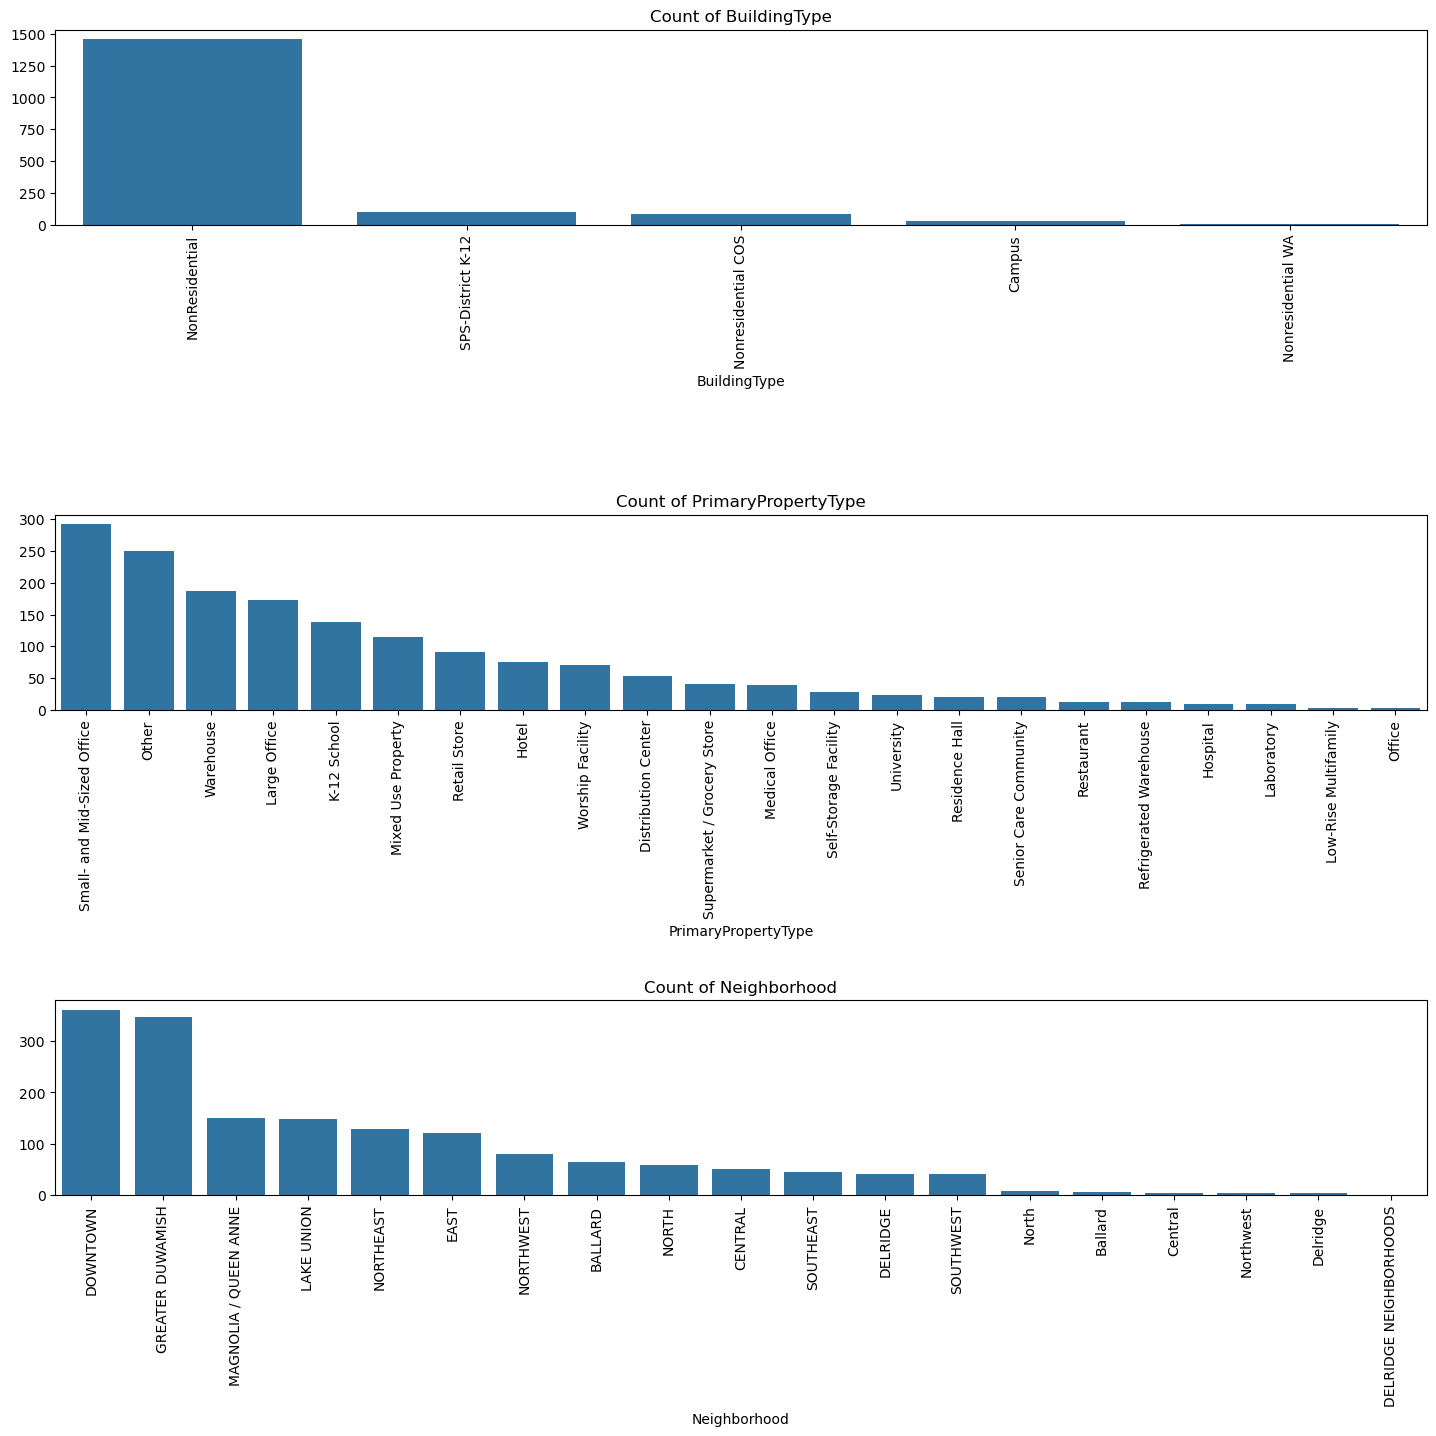

In [16]:
plot_barplots(X_clean, ['BuildingType', 'PrimaryPropertyType', 'Neighborhood'])

For Neihborhood we need to group North with NORTH, central with CENTRAL ,ect ...

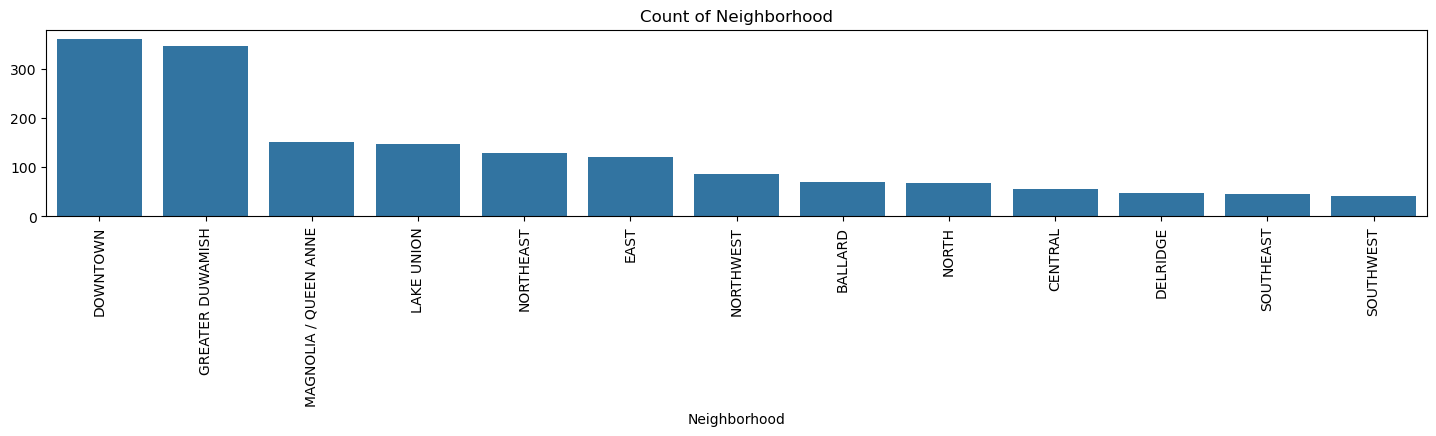

In [18]:
X_clean['Neighborhood'] = X_clean['Neighborhood'].str.upper()
X_clean['Neighborhood'] = X_clean['Neighborhood'].str.replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')
plot_barplots(X_clean, ['Neighborhood'])

In [19]:
data[main_features].describe()

,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,3367.00,3371.00
mean,119.72,5403667.29
std,538.83,21610628.63
min,-0.80,0.00
25%,9.50,925128.59
50%,33.92,1803753.25
75%,93.94,4222455.25
max,16870.98,873923712.00


we have GHG min -0.80 is not possible

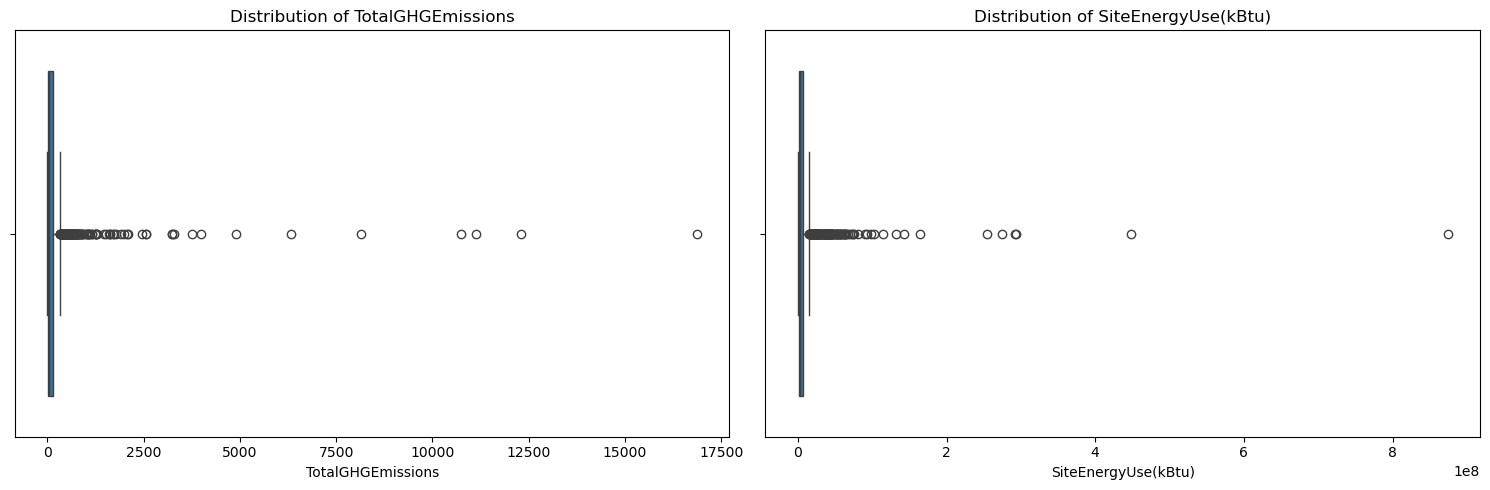

In [28]:
plot_boxplots(X_clean[X_clean['Outlier'].isna()], main_features)